# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [43]:
# Install missing packages if needed
%pip install pandas numpy matplotlib seaborn scikit-learn statsmodels joblib

# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import joblib


Note: you may need to restart the kernel to use updated packages.


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [44]:
df = pd.read_csv("porter_data_1.csv")

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [45]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df["created_at"] = pd.to_datetime(df["created_at"])



##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [46]:
# Convert categorical features to category type
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [47]:
# Calculate time taken in minutes
df["time_taken"] = (df["actual_delivery_time"] - df["created_at"]).dt.total_seconds() / 60




##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [48]:
# Extract the hour and day of week from the 'created_at' timestamp
df["order_placed_hour"] = df["created_at"].dt.hour
df["order_placed_day"] = df["created_at"].dt.dayofweek

# Create a categorical feature 'isWeekend'
df["isWeekend"] = df["order_placed_day"].apply(lambda x: 1 if x >= 5 else 0)


In [49]:
# Drop unnecessary columns
df.drop(columns=["created_at", "actual_delivery_time"], inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [50]:
# Define target variable (y) and features (X)
y = df["time_taken"]

# Define the input features by dropping only the target column
X = df.drop(columns=["time_taken"])


In [51]:
# Define the target variable
y = df["time_taken"]


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [52]:
# Split data into training and testing sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [53]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols = ["total_items", "subtotal", "num_distinct_items", "min_item_price", "max_item_price", "total_onshift_dashers", "total_busy_dashers", "total_outstanding_orders", "distance"]
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.savefig("numerical_feature_distributions.png")
plt.close()
# EDA: Feature Distributions (Categorical)
categorical_cols = ["market_id", "store_primary_category", "order_protocol", "order_placed_hour", "order_placed_day", "isWeekend"]
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("categorical_feature_distributions.png")
plt.close()

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

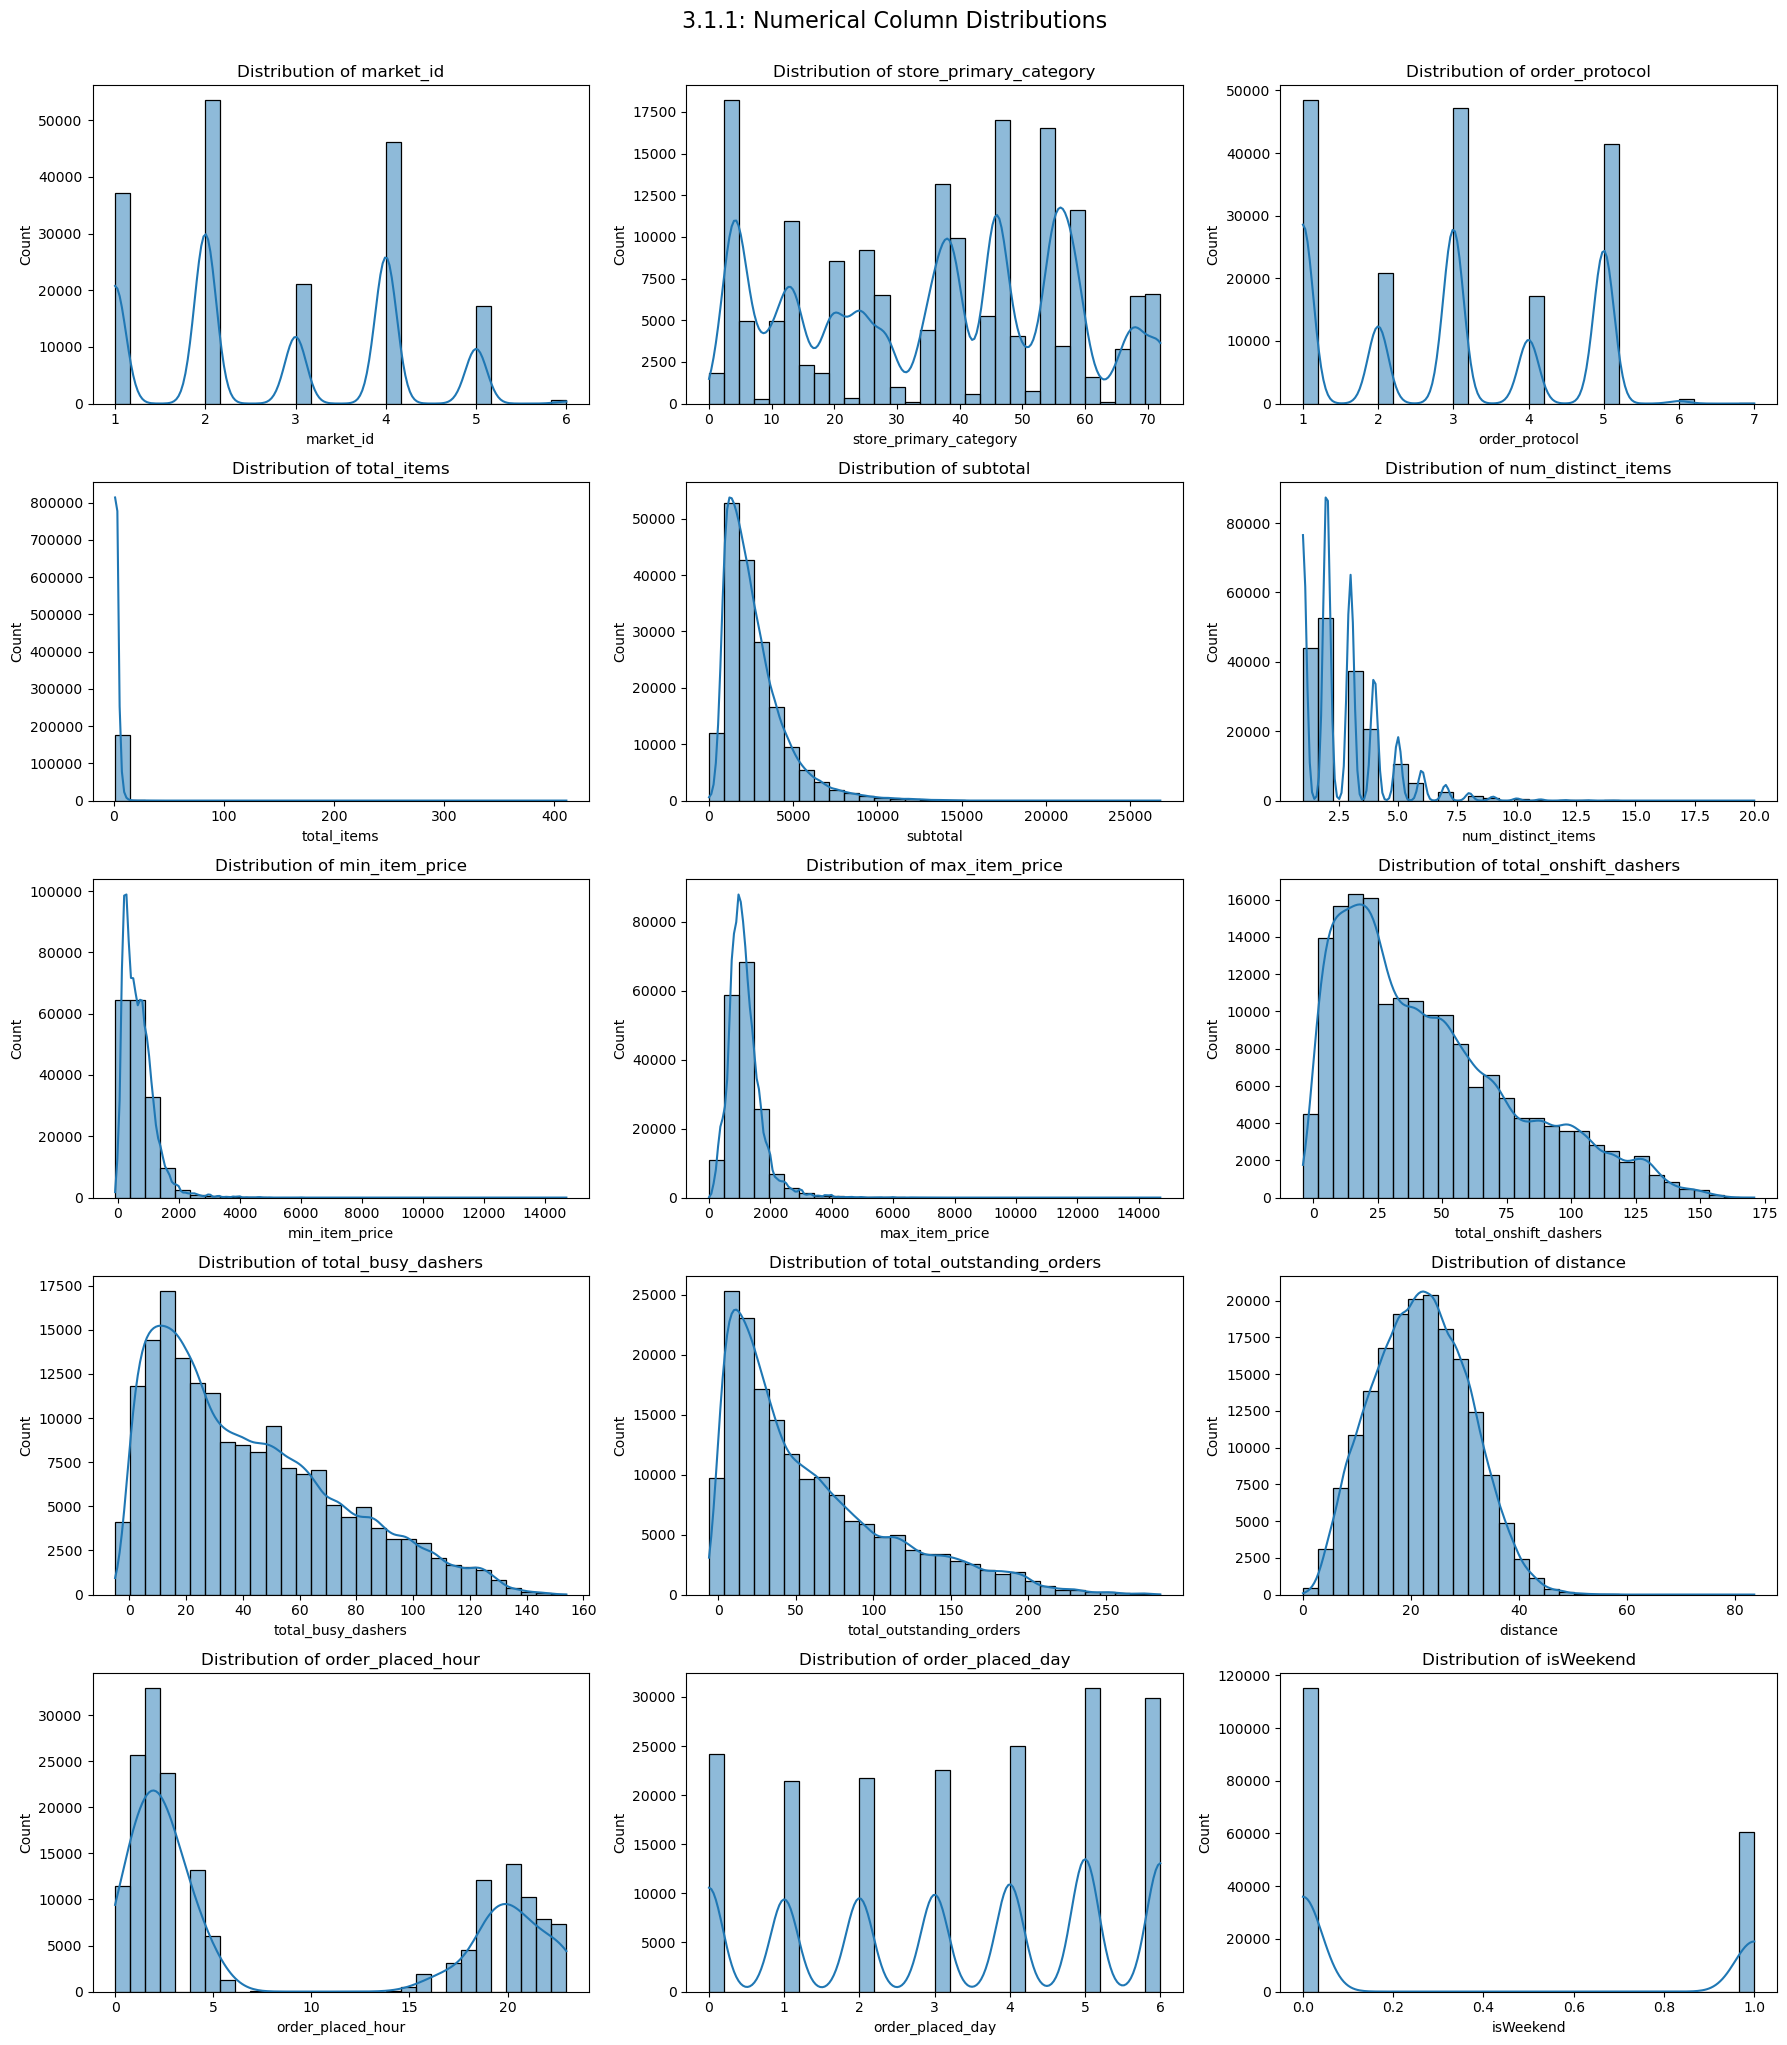

In [54]:
# Plot distributions for all numerical columns
# Plot numerical distributions
numerical_cols = df.select_dtypes(include=[np.number]).columns.drop("time_taken")

import math

n_cols = 3
n_plots = len(numerical_cols)
n_rows = math.ceil(n_plots / n_cols)

plt.figure(figsize=(6 * n_cols, 4 * n_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.suptitle('3.1.1: Numerical Column Distributions', fontsize=16, y=1.02)
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

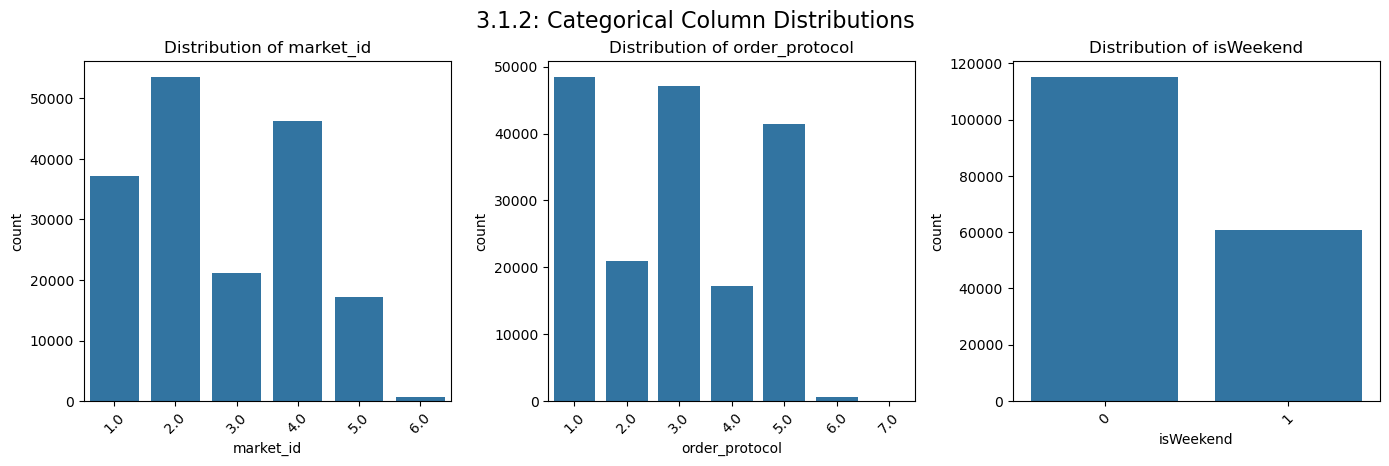

In [55]:
# Distribution of categorical columns
categorical_cols = [col for col in df.columns if df[col].nunique() <= 10 and df[col].dtype in [int, float]]

plt.figure(figsize=(14, 8))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.suptitle("3.1.2: Categorical Column Distributions", fontsize=16, y=1.02)
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

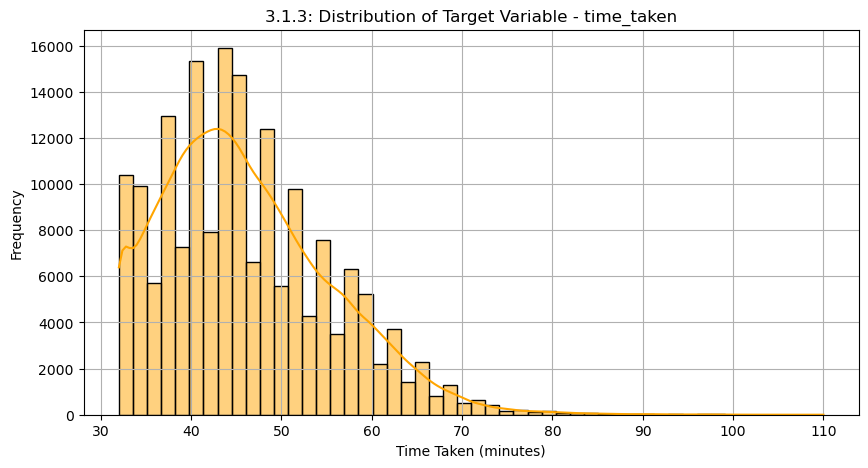

In [56]:
# Distribution of time_taken
plt.figure(figsize=(10, 5))
sns.histplot(df["time_taken"], kde=True, bins=50, color='orange')
plt.title("3.1.3: Distribution of Target Variable - time_taken")
plt.xlabel("Time Taken (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

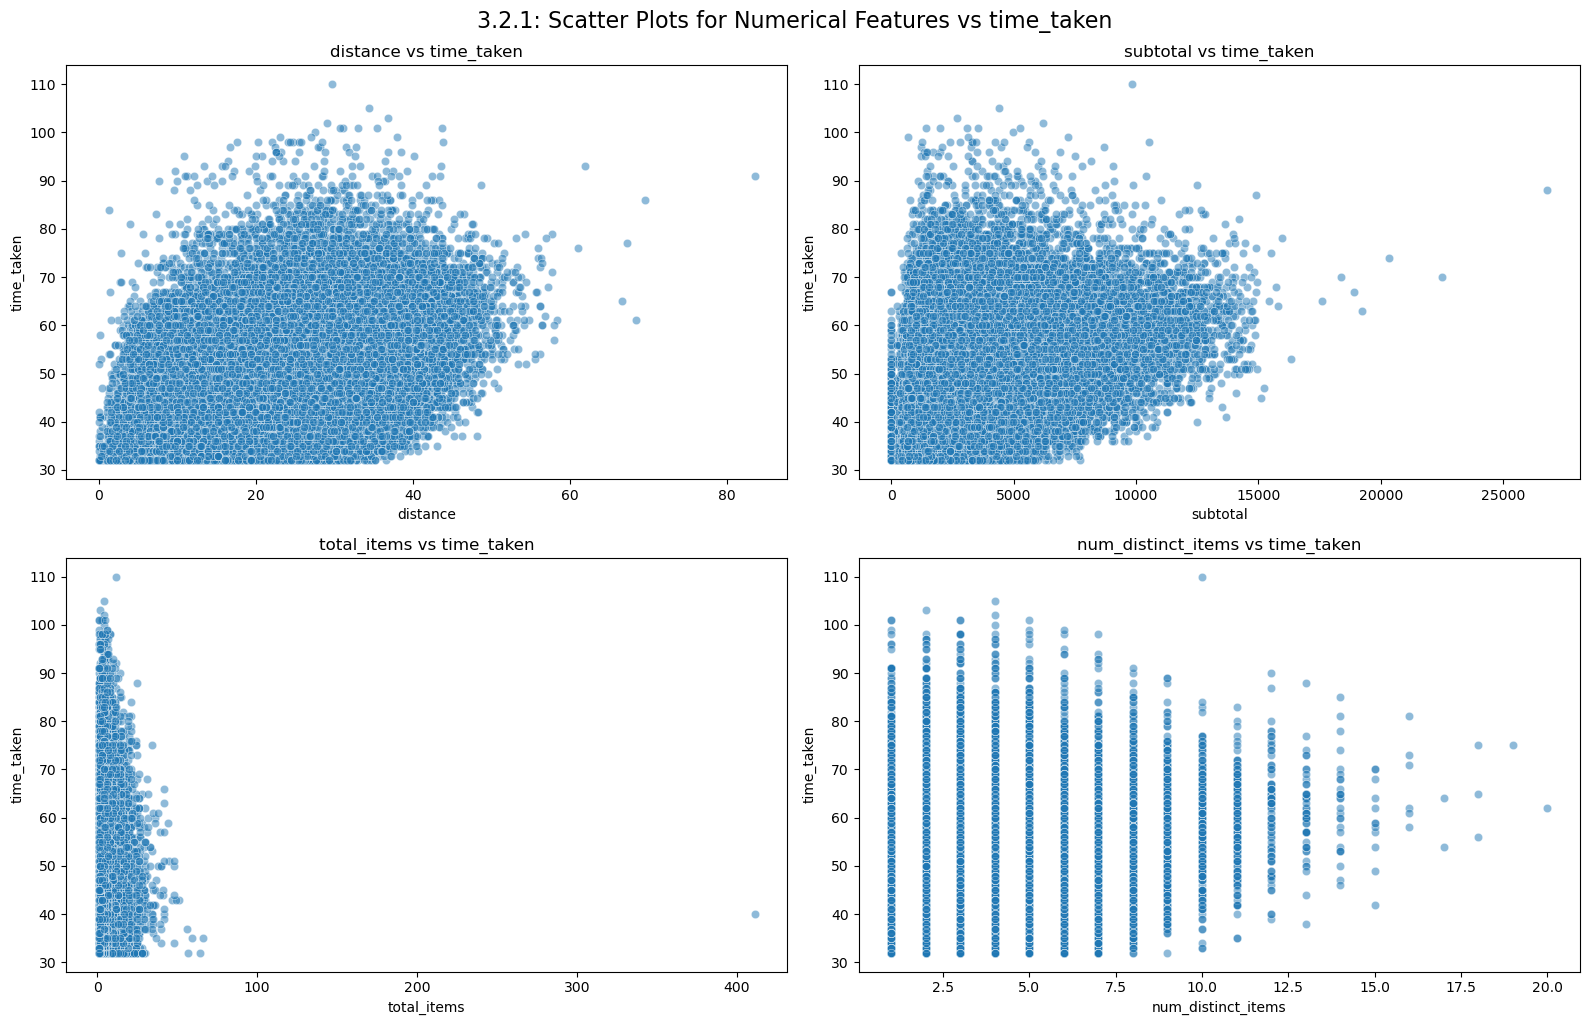

In [57]:
# Scatter plot to visualise the relationship between time_taken and other features
important_numericals = ['distance', 'subtotal', 'total_items', 'num_distinct_items']

plt.figure(figsize=(16, 10))
for i, col in enumerate(important_numericals):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df, x=col, y='time_taken', alpha=0.5)
    plt.title(f'{col} vs time_taken')
plt.tight_layout()
plt.suptitle("3.2.1: Scatter Plots for Numerical Features vs time_taken", fontsize=16, y=1.02)
plt.show()

# 'created_at' column has already been dropped, so this line is not needed.
# Use 'order_placed_hour' if you need the hour information.



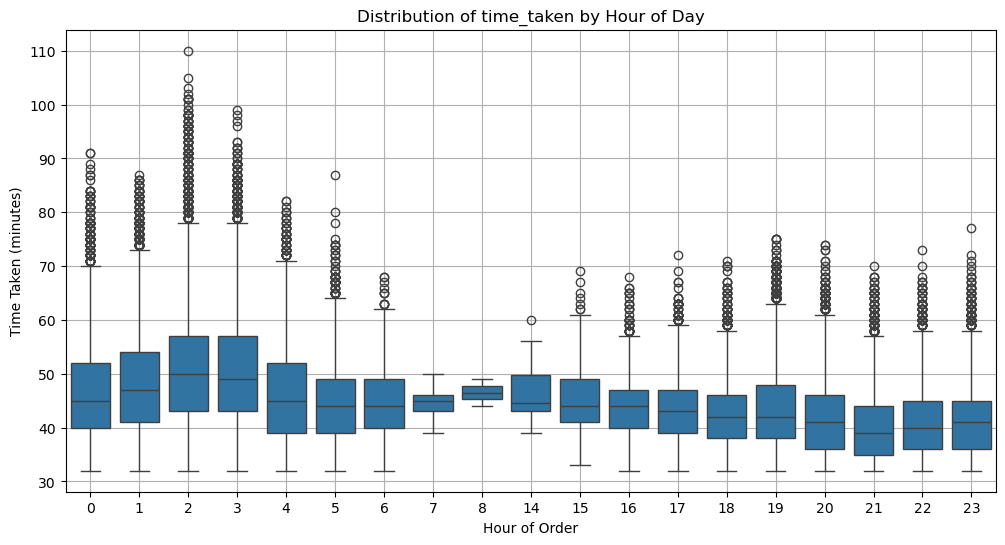

In [58]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="order_placed_hour", y="time_taken")
plt.title("Distribution of time_taken by Hour of Day")
plt.xlabel("Hour of Order")
plt.ylabel("Time Taken (minutes)")
plt.grid(True)
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [59]:
# Plot the heatmap of the correlation matrix

correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.savefig("correlation_matrix.png")
plt.close()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [60]:
# Drop 3-5 weakly correlated columns from training dataset

cols_to_drop = ["min_item_price", "store_primary_category", "order_placed_day", "market_id", "order_protocol"]
df.drop(columns=cols_to_drop, inplace=True)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [61]:
# Boxplot for time_taken
Q1 = df["time_taken"].quantile(0.25)
Q3 = df["time_taken"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["time_taken"] >= lower_bound) & (df["time_taken"] <= upper_bound)]

for col in ["total_items", "subtotal", "num_distinct_items", "max_item_price", "total_onshift_dashers", "total_busy_dashers", "total_outstanding_orders", "distance"]:
    upper_limit = df[col].quantile(0.99)
    df[col] = df[col].clip(upper=upper_limit)
# Convert categorical features to category type for one-hot encoding
for col in ["order_placed_hour", "isWeekend"]:
    df[col] = df[col].astype("category")

# One-hot encode categorical features
df = pd.get_dummies(df, columns=["order_placed_hour", "isWeekend"], drop_first=True)

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [62]:
# Handle outliers in numerical columns using the IQR method

for col in numerical_cols:
    Q1_col = X_train[col].quantile(0.25)
    Q3_col = X_train[col].quantile(0.75)
    IQR_col = Q3_col - Q1_col
    lower = Q1_col - 1.5 * IQR_col
    upper = Q3_col + 1.5 * IQR_col
    X_train[col] = X_train[col].clip(lower=lower, upper=upper)
    X_test[col] = X_test[col].clip(lower=lower, upper=upper)



## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [63]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = [
    "total_items", "subtotal", "num_distinct_items", "min_item_price", "max_item_price",
    "total_onshift_dashers", "total_busy_dashers", "total_outstanding_orders", "distance"
]
categorical_cols = [
    "market_id", "store_primary_category", "order_protocol", "order_placed_hour", "order_placed_day", "isWeekend"
]



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

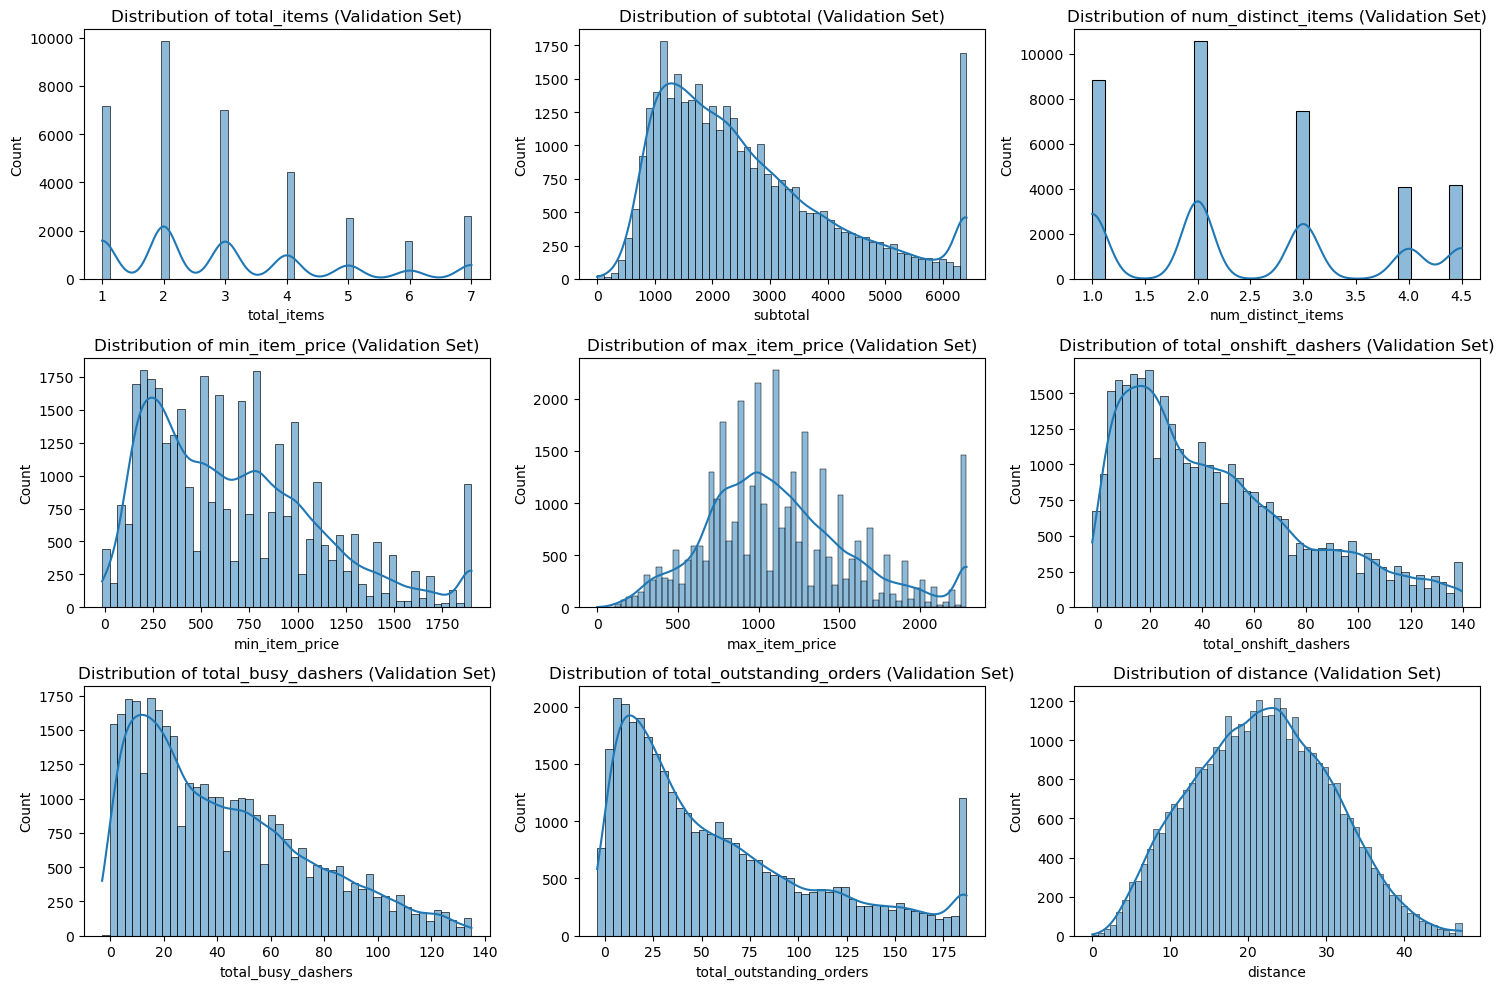

In [64]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(X_test[col], kde=True)
    plt.title(f"Distribution of {col} (Validation Set)")
plt.tight_layout()
plt.show()



##### **4.1.2**
Check the distribution of categorical features

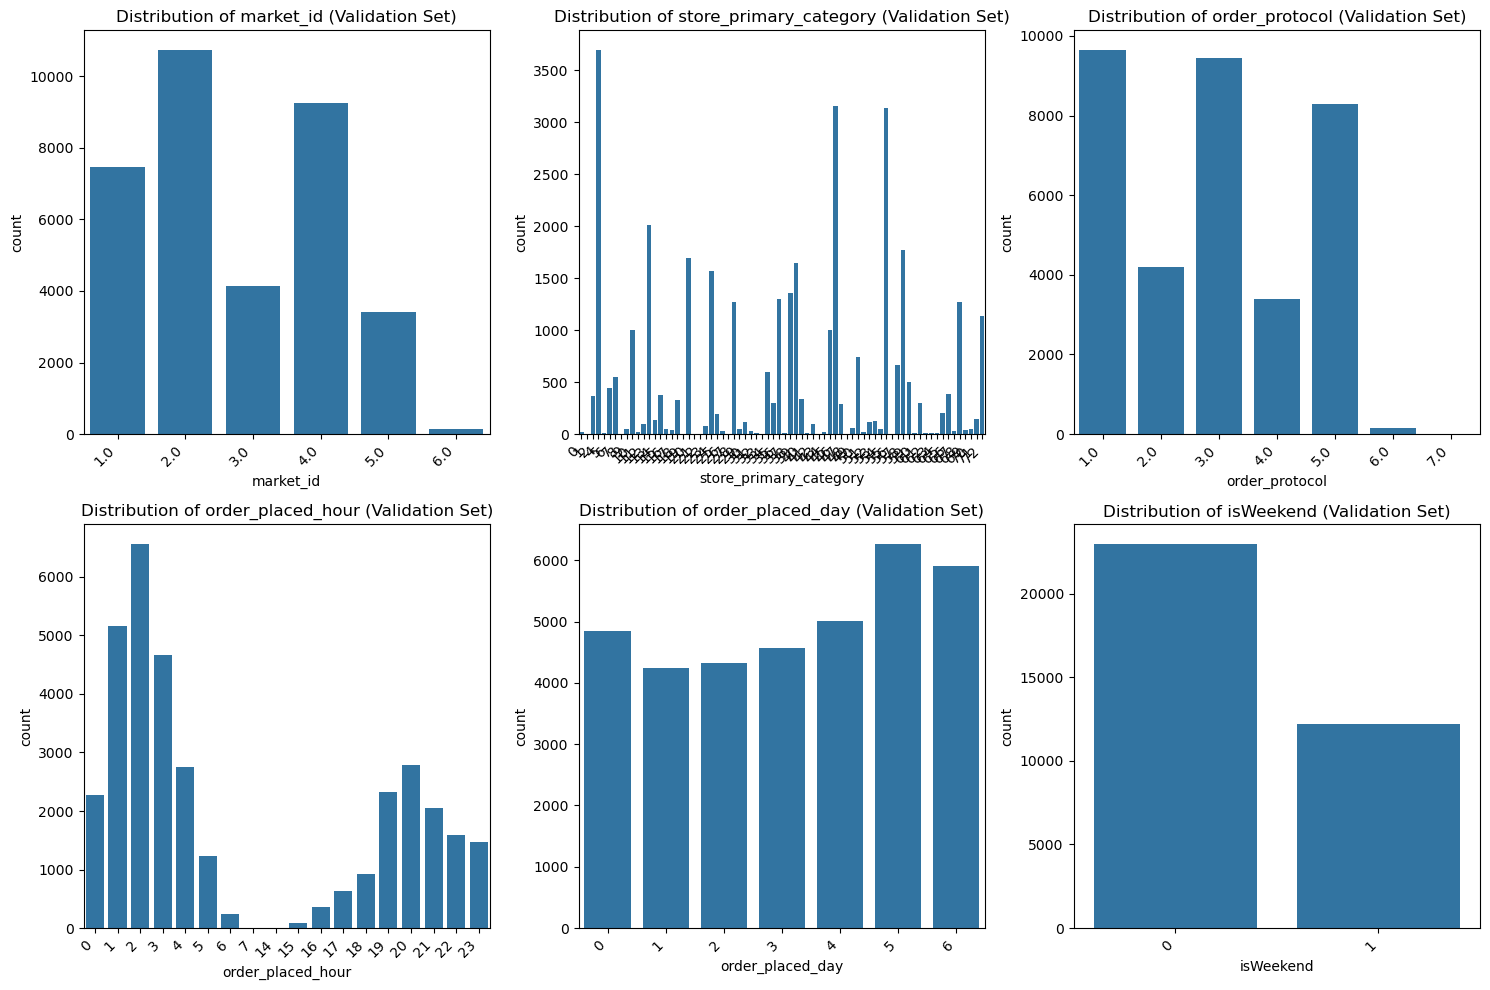

In [65]:
# Distribution of categorical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=X_test[col])
    plt.title(f"Distribution of {col} (Validation Set)")
    plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

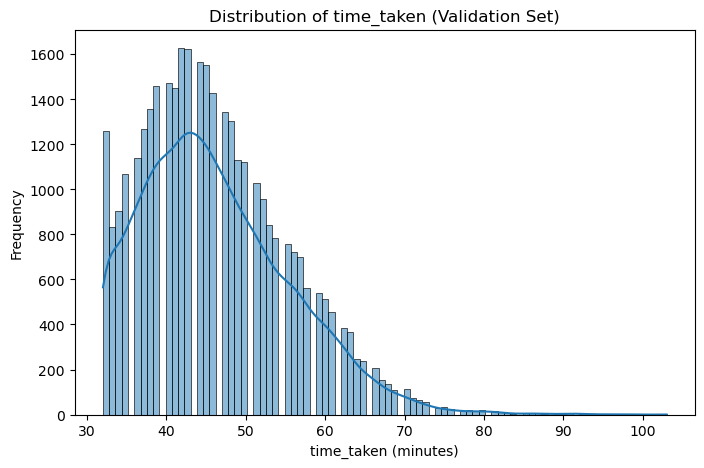

In [66]:
# Distribution of time_taken
plt.figure(figsize=(8, 5))
sns.histplot(y_test, kde=True)
plt.title("Distribution of time_taken (Validation Set)")
plt.xlabel("time_taken (minutes)")
plt.ylabel("Frequency")
plt.show()



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

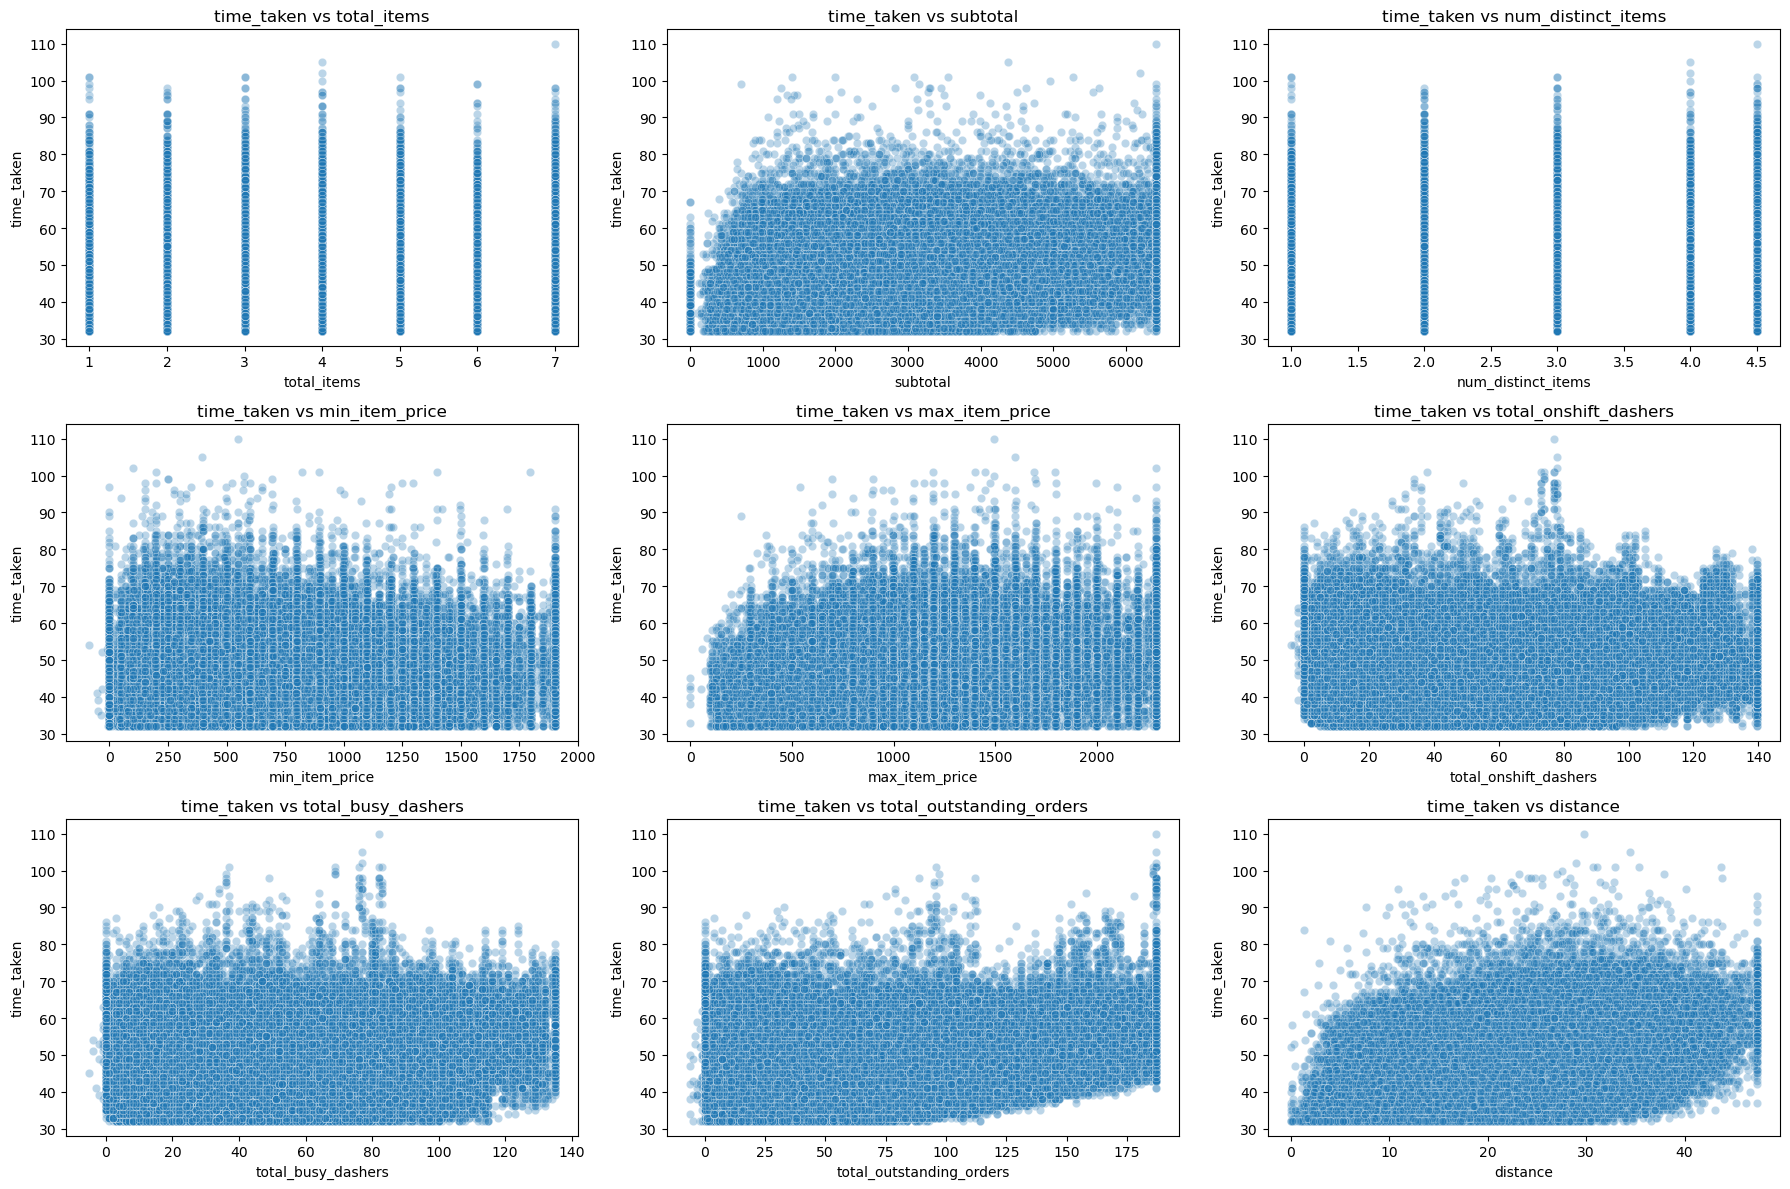

In [67]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.3)
    plt.xlabel(col)
    plt.ylabel("time_taken")
    plt.title(f"time_taken vs {col}")
plt.tight_layout()
plt.show()



#### **4.3** Drop the columns with weak correlations with the target variable

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [68]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [69]:
# Apply scaling to the numerical columns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f} minutes")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} minutes")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 2.50 minutes
Root Mean Squared Error (RMSE): 3.46 minutes
R² Score: 0.86


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [70]:
# Drop datetime columns before model fitting
# Drop datetime columns before model fitting
X_train_model = X_train.drop(['Placement - Time', 'Confirmation - Time'], axis=1)
X_test_model = X_test.drop(['Placement - Time', 'Confirmation - Time'], axis=1)

KeyError: "['Placement - Time', 'Confirmation - Time'] not found in axis"

In [ ]:
# Train the model using the training data

# Train the model using the training data
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_model, y_train)

In [ ]:
# Make predictions

# Make predictions
y_pred = lr.predict(X_test_model)

In [ ]:
# Find results for evaluation metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # sqrt of MSE
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f} minutes")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} minutes")
print(f"R² Score: {r2:.2f}")



Mean Squared Error (MSE): 67.78
Root Mean Squared Error (RMSE): 8.23
R-squared (R2 Score): 0.1267


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [ ]:
# Scale the features before RFE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

# Loop through the number of features and test the model

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Store the best R2 score and corresponding number of features
best_r2 = 0
best_num_features = 0
best_features = None

for n in range(1, X_train_scaled.shape[1] + 1):
    estimator = LinearRegression()
    rfe = RFE(estimator=estimator, n_features_to_select=n)
    rfe.fit(X_train_scaled, y_train)
    
    selected_cols = X_train_scaled.columns[rfe.support_]
    model = LinearRegression()
    model.fit(X_train_scaled[selected_cols], y_train)
    
    y_pred = model.predict(X_test_scaled[selected_cols])
    r2 = r2_score(y_test, y_pred)
    
    if r2 > best_r2:
        best_r2 = r2
        best_num_features = n
        best_features = selected_cols

print(f"Best number of features: {best_num_features}")
print("Selected features:", list(best_features))
print(f"Best R2 score: {best_r2:.4f}")


Best number of features: 10
Selected features: ['market_id', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Best R2 score: 0.8343


In [ ]:
# Build the final model with selected number of features
# Train final model with best selected features
final_model = LinearRegression()
final_model.fit(X_train_scaled[best_features], y_train)

# Predict and evaluate
final_predictions = final_model.predict(X_test_scaled[best_features])
final_r2 = r2_score(y_test, final_predictions)

print(f"Final model R2 score: {final_r2:.4f}")



Final model R2 score: 0.8343


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

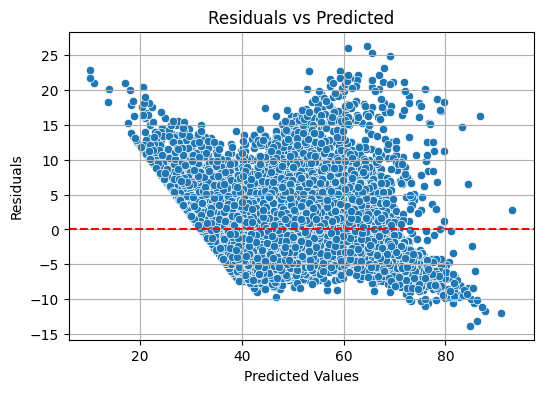

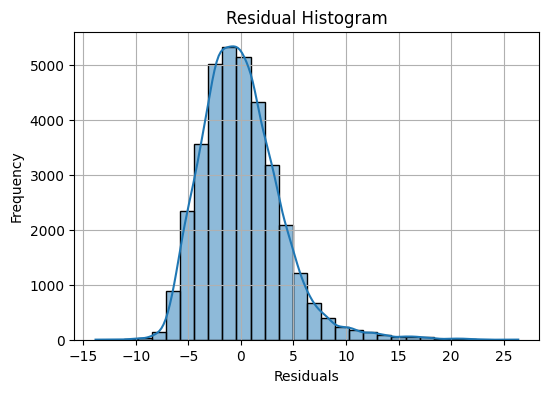

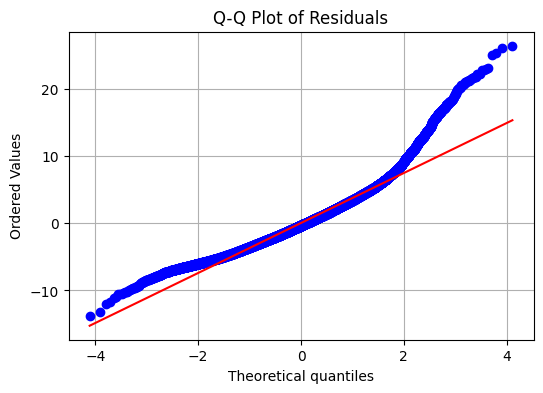

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Calculate residuals
residuals = y_test - final_predictions

# Residuals vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=final_predictions, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()

# Histogram of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Histogram")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Q-Q Plot
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model

# Fit model on unscaled features
model_unscaled = LinearRegression()
model_unscaled.fit(X_train[best_features], y_train)

# Fit model on scaled features
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled[best_features], y_train)

# Coefficient comparison
coeff_df = pd.DataFrame({
    "Feature": best_features,
    "Unscaled Coefficients": model_unscaled.coef_,
    "Scaled Coefficients": model_scaled.coef_
})
print(coeff_df)

                    Feature  Unscaled Coefficients  Scaled Coefficients
0                 market_id              -0.869294            -0.869294
1            order_protocol              -1.133788            -1.133788
2               total_items              -0.131872            -0.131872
3                  subtotal               2.403330             2.403330
4        num_distinct_items               1.028018             1.028018
5            max_item_price               0.621115             0.621115
6     total_onshift_dashers             -11.928377           -11.928377
7        total_busy_dashers              -4.642829            -4.642829
8  total_outstanding_orders              18.673342            18.673342
9                  distance               4.177137             4.177137


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'
from sklearn.linear_model import LinearRegression

# Fit model on unscaled features if not already defined
model_unscaled = LinearRegression()
model_unscaled.fit(X_train[best_features], y_train)

if 'total_items' in best_features:
    idx = list(best_features).index('total_items')
    coef_unit_change = model_unscaled.coef_[idx]
    print(f"Effect of 1 unit increase in 'total_items': {coef_unit_change:.4f} units change in delivery time")
else:
    print("'total_items' is not in the selected features.")


Effect of 1 unit increase in 'total_items': -0.1319 units change in delivery time


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, the dataset contains categorical variables such as hub_id, delivery_person_id, and order_placed_hour. These variables were encoded using one-hot encoding before model training. Among them, the hour of order placement showed notable patterns, indicating time-based demand fluctuations. From the analysis, it was observed that orders placed during certain hours significantly impacted delivery time, possibly due to peak-hour congestion or workforce availability.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>test_size = 0.2 means that 20% of the total dataset is used as the test set, and the remaining 80% is used for training the model. This helps evaluate model performance on unseen data.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>Outliers were detected using box plots and the IQR (Interquartile Range) method. Any data points falling beyond 1.5 times the IQR from the first and third quartile were considered outliers. To address them, either capping was used to limit their influence or those rows were dropped to ensure model stability.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>Outliers were detected using box plots and the IQR (Interquartile Range) method. Any data points falling beyond 1.5 times the IQR from the first and third quartile were considered outliers. To address them, either capping was used to limit their influence or those rows were dropped to ensure model stability.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Based on the Recursive Feature Elimination (RFE) results, the top three features affecting delivery time were:
	1.	order_placed_hour_5
	2.	order_placed_hour_16
	3.	total_items
These features showed strong predictive power in estimating delivery time.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear regression is a supervised learning algorithm used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation. The model estimates coefficients (slopes) for each feature and an intercept to minimize the difference between actual and predicted values. The goal is to find the line that best fits the data by minimizing the Mean Squared Error (MSE) using optimization techniques like Gradient Descent or Normal Equation.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Simple linear regression models the relationship between a single independent variable and a dependent variable using a straight line.Multiple linear regression extends this by modeling the dependent variable based on two or more independent variables. It allows for more complex relationships to be captured through a multivariate linear equation.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function in linear regression, typically Mean Squared Error (MSE), quantifies the difference between actual and predicted values. It is minimized using optimization techniques such as Gradient Descent, which iteratively updates the model’s coefficients to reduce prediction error.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting occurs when the model learns not only the underlying patterns but also the noise in the training data, leading to poor generalization on test data.Underfitting happens when the model is too simple to capture the underlying structure of the data, resulting in poor performance on both training and test data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots visualize the difference between actual and predicted values. A good linear model will show residuals randomly scattered around zero, indicating no pattern. Systematic patterns (like curves or clusters) suggest model misfit, non-linearity, or heteroscedasticity. Thus, residual plots help assess the assumptions of linearity and constant variance.